### CogentLab数据集

- 100HZ
- 由3D加速计、3D陀螺仪和蓝牙设备组成
- 方案1包括四种类型的跌倒（向前、向后、向左和向右跌倒）和一组ADL（站立、坐、行走和躺着）。
- 28名男性、4名女性受试者


Annotation 1
======================================
Falls = 1

Near falls = 2

Activities fo Daily Living (ADL) = 0


Annotation 2 (annoates every activities)
========================================
Unspecified activities (transition from one posture to another) = 0

Standing = 1

Fall forward = 2

Lying = 3

Sitting on a bed = 4

Sitting on a chair = 5

Fall backward = 6

Near fall = 7

Walking = 8

Crouching = 9

Fall right = 10

Fall left = 11

Real fall forward = 12

Real fall backward = 13

Ascending and Descending a staircase = 15

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
filepath="E:/Fall/Cogent/data/subject_2"
df = pd.read_csv(filepath)
display(df)

,ch_accel_x,ch_accel_y,ch_accel_z,ch_gyro_x,ch_gyro_y,ch_gyro_z,th_accel_x,th_accel_y,th_accel_z,th_gyro_x,th_gyro_y,th_gyro_z,annotation_1,annotation_2
0,0.99454,0.007833,-0.047618,2.56320,1.8308,-32.223,0.965840,0.11288,0.37380,-0.73233,1.83080,0.00000,0,0
1,1.00270,-0.005222,-0.042327,2.19700,3.2955,-31.856,0.955310,0.10225,0.35761,-1.46470,1.46470,0.00000,0,0
2,1.00550,0.013055,-0.055554,1.46470,6.2248,-31.124,0.968470,0.11288,0.34951,-2.19700,1.46470,1.09850,0,0
3,0.97815,0.023499,-0.050263,1.83080,7.3233,-31.124,0.979000,0.10491,0.36031,-1.46470,1.09850,0.00000,0,0
4,0.99727,0.020888,-0.058199,3.66170,5.8587,-31.124,0.963210,0.11022,0.36840,-1.83080,1.83080,0.00000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157641,-0.32514,0.420370,-0.925900,0.36617,4.3940,-32.223,-0.084215,-0.74233,-0.58162,-1.09850,0.73233,0.00000,0,0
157642,-0.33060,0.430820,-0.928550,1.09850,4.7602,-31.856,-0.097374,-0.74233,-0.56003,-0.73233,1.09850,0.36617,0,0
157643,-0.33607,0.415150,-0.915320,1.83080,4.3940,-31.490,-0.107900,-0.73170,-0.56542,-1.09850,0.73233,0.36617,0,0
157644,-0.33060,0.420370,-0.925900,1.46470,4.7602,-31.856,-0.094742,-0.75295,-0.57892,-0.36617,1.46470,0.36617,0,0


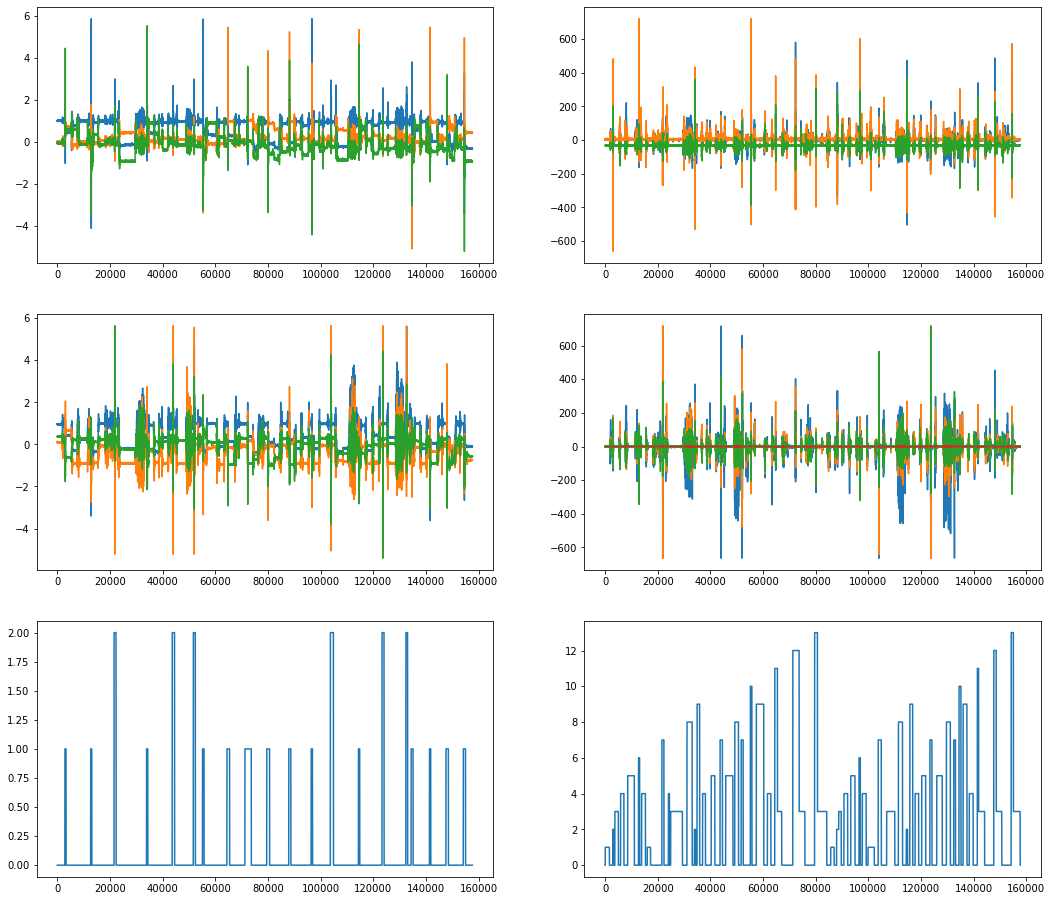

In [8]:
plt.figure(figsize=(18,16))
plt.subplot(3,2,1)
plt.plot(df['ch_accel_x'])
plt.plot(df['ch_accel_y'])
plt.plot(df['ch_accel_z'])
plt.subplot(3,2,2)
plt.plot(df['ch_gyro_x'])
plt.plot(df['ch_gyro_y'])
plt.plot(df['ch_gyro_z'])
plt.subplot(3,2,3)
plt.plot(df['th_accel_x'])
plt.plot(df['th_accel_y'])
plt.plot(df['th_accel_z'])
plt.subplot(3,2,4)
plt.plot(df['th_gyro_x'])
plt.plot(df['th_gyro_y'])
plt.plot(df['th_gyro_z'])
plt.plot(df['th_accel_z'])
plt.subplot(3,2,5)
plt.plot(df['annotation_1'])
plt.subplot(3,2,6)
plt.plot(df['annotation_2'])

#### 重注标签

<font size=4>1.去掉标签为2的数据</font>  

<font size=4>2.找到每次跌倒发生时ch_accel_x的峰值，将该峰值的左右50个数据标注为跌倒。</font>

In [10]:
# 删除annotation_1列包含数字2的行
df = df[~df['annotation_1'].isin([2])]
#调整df的标号
df.reset_index(drop=True, inplace=True)
i = 0
start_list=[]#统计所有跌倒的开始点
end_list=[]#统计所有跌倒的结束
while (i < len(df)):
    if (df['annotation_1'][i] == 1.0):  # 一次跌倒发生的开始
        start_fall_index = i  # 一次跌倒发生的开始点
        end = i + 1
        while ((0.0 in list(df['annotation_1'][start_fall_index:end])) == False):
            i = i + 1
            end = i
        end_fall_index = end - 2
        start_list.append(start_fall_index)
        end_list.append(end_fall_index)
        # 找到峰值所在的坐标
        max_id = df['ch_accel_x'][start_fall_index:end_fall_index + 1].idxmax()
        print(start_fall_index, end_fall_index, df['ch_accel_x'][start_fall_index:end_fall_index + 1].max(),
              df['ch_accel_x'][start_fall_index:end_fall_index + 1].idxmax())  # end_fall_index 一次跌倒发生的结束点
        # 选取峰值附近的数据，假设跌倒发生在2s内，就让max_id向左向右的100个数据注释不变。
        j = start_fall_index
        while (j < max_id - 50):
            df['annotation_1'][j] = 0.0
            j = j + 1
        k = end_fall_index
        while (k > max_id + 50):
            df['annotation_1'][k] = 0.0
            k = k - 1
    else:
        i = i + 1

2854 3292 1.571 3016


C:\Users\Lenovo\AppData\Local\Temp/ipykernel_21080/1185597112.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['annotation_1'][j] = 0.0
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_21080/1185597112.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['annotation_1'][k] = 0.0


12635 13066 5.8525 12893
33102 33575 2.1803 33365
52685 53276 5.8388 52996
61960 62978 3.2049 62313
68802 71216 1.2131 69580
77090 78170 3.8361 77659
85449 86243 1.8579 85748
93958 94468 5.8552 94265
110753 111235 2.5246 111041
129323 130070 3.7951 129633
136289 136771 4.5082 136573
142539 143471 1.6803 142978
149137 149983 3.2623 149569


#### 窗口处理

In [ ]:
窗口大小为100，重叠25%。

In [17]:
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import stats
labels_number=[]
segments=[]
labels=[]
TIME_STEPS=100
step=75
scale_columns = ['ch_accel_x','ch_accel_y','ch_accel_z','ch_gyro_x','ch_gyro_y','ch_gyro_z','th_accel_x','th_accel_y','th_accel_z','th_gyro_x','th_gyro_y','th_gyro_z']
# 归一化，映射到-1到1之间
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(df[scale_columns])
df.loc[:, scale_columns] = scaler.transform(df[scale_columns].to_numpy())
for i in range (0,len(df)-TIME_STEPS,step):
    x = df['ch_accel_x'].values[i:i + TIME_STEPS].reshape(-1, 1)
    y = df['ch_accel_y'].values[i:i + TIME_STEPS].reshape(-1, 1)
    z = df['ch_accel_z'].values[i:i + TIME_STEPS].reshape(-1, 1)
    xs = df['ch_gyro_x'].values[i:i + TIME_STEPS].reshape(-1, 1)
    ys = df['ch_gyro_y'].values[i:i + TIME_STEPS].reshape(-1, 1)
    zs = df['ch_gyro_z'].values[i:i + TIME_STEPS].reshape(-1, 1)
    xx = df['th_accel_x'].values[i:i + TIME_STEPS].reshape(-1, 1)
    yy = df['th_accel_y'].values[i:i + TIME_STEPS].reshape(-1, 1)
    zz = df['th_accel_z'].values[i:i + TIME_STEPS].reshape(-1, 1)
    xxs = df['th_gyro_x'].values[i:i + TIME_STEPS].reshape(-1, 1)
    yys = df['th_gyro_y'].values[i:i + TIME_STEPS].reshape(-1, 1)
    zzs = df['th_gyro_z'].values[i:i + TIME_STEPS].reshape(-1, 1)
    label = stats.mode(df['annotation_1'][i:i + TIME_STEPS])[0][0]  # 出现最多的类别
    label_number = stats.mode(df['annotation_1'][i:i + TIME_STEPS])[1][0]  # 出现最多的类别的个数
    segments.append(np.hstack((x,y,z,xs, ys, zs,xx,yy,zz,xxs,yys,zzs)))
    labels.append(label)
    labels_number.append(label_number)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [16]:
print(np.shape(labels))
print(np.shape(segments))

(2034,)
(2034, 100, 12)


In [1]:
-------------1-------------
K fold  TCN acc:99.5655%
K fold average TCN loss: 2.3961%
K fold tn: 19309
K fold fp: 52
K fold fn: 33
K fold tp: 170
K fold Accuracy: 0.9956552852177469
K fold precision: 0.7657657657657657
K fold recall: 0.8374384236453202
-------------2-------------
K fold  TCN acc:99.6729%
K fold average TCN loss: 1.3185%
K fold tn: 19354
K fold fp: 22
K fold fn: 42
K fold tp: 146
K fold Accuracy: 0.9967286853404211
K fold precision: 0.8690476190476191
K fold recall: 0.776595744680851
-------------3-------------
K fold  TCN acc:99.5809%
K fold average TCN loss: 2.0779%
K fold tn: 19334
K fold fp: 26
K fold fn: 56
K fold tp: 148
K fold Accuracy: 0.9958086280924147
K fold precision: 0.8505747126436781
K fold recall: 0.7254901960784313
--------------------------------------------------
K fold  TCN acc:99.5809%
K fold  TCN loss: 2.0779%
K fold average Accuracy: 0.9960641995501942
K fold average precision: 0.8284626991523543
K fold average recall: 0.7798414548015341

SyntaxError: invalid syntax (Temp/ipykernel_8196/1735367100.py, line 1)